## Projet 7 - OpenClassRoom
### Notebook de prédiction - Protypage de ce que doit faire l'API et le Dashboard
### C'est un Notebook pour aider à élaborer le Dasboard

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [2]:
# Drop sécurisé d'une liste de colonnes
# -------------------------------------
def drop_columns(columns_to_drop, dataset):
    for column in columns_to_drop:
        try:
            dataset.drop(column, axis=1, inplace=True)
        except:
            print('colonne {} absente du jeu de donnée'.format(column))
        
    return (dataset)

## Chargement des données et des modèles

In [3]:
# Rechargement
app_test = pd.read_csv('application_test.csv')
app_test_domain = pd.read_csv('app_test_domain.csv')

app_train = pd.read_csv('application_train.csv')
app_train_domain = pd.read_csv('app_train_domain.csv')

app_test = drop_columns(['Unnamed: 0'], app_test)
app_train = drop_columns(['Unnamed: 0'], app_train)
app_test_domain = drop_columns(['Unnamed: 0'], app_test_domain)
app_train_domain = drop_columns(['Unnamed: 0'], app_train_domain)


colonne Unnamed: 0 absente du jeu de donnée
colonne Unnamed: 0 absente du jeu de donnée


In [5]:
print (app_test.loc[6,'CODE_GENDER'])
print (type(app_test.loc[6,'CODE_GENDER']))



M
<class 'str'>


In [3]:
# Chargement du model et des données
with open('y_smt_domain.bin', 'rb') as f_in:
    y_smt_domain = pickle.load(f_in)
    f_in.close()
with open('X_smt_domain.bin', 'rb') as f_in:
    X_smt_domain = pickle.load(f_in)
    f_in.close()

with open('y_test_domain.bin', 'rb') as f_in:
    y_test_domain = pickle.load(f_in)
    f_in.close()
with open('X_test_domain.bin', 'rb') as f_in:
    X_test_domain = pickle.load(f_in)
    f_in.close()

    
with open('test_domain.bin', 'rb') as f_in:
    test_domain = pickle.load(f_in)
    f_in.close()


In [4]:
# Chargement du model
with open('model_clf_xgb.bin', 'rb') as f_in:
    clf_xgb = pickle.load(f_in)
    f_in.close()
    
# Chargement du model
with open('model_clf_rf.bin', 'rb') as f_in:
    clf_rf = pickle.load(f_in)
    f_in.close()
    

In [5]:
print (y_smt_domain.shape)
print (X_smt_domain.shape)
print (y_test_domain.shape)
print (X_test_domain.shape)

print (test_domain.shape)

(49650,)
(49650, 243)
(61503,)
(61503, 243)
(48744, 243)


In [33]:
print (app_train_domain.shape)
print (app_test_domain.shape)

print (app_train.shape)
print (app_test.shape)


(307511, 244)
(48744, 243)
(307511, 122)
(48744, 121)


In [22]:
def fill_df(df):
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy = 'median')
    
    col = df.columns
    df_ndarray = imputer.fit_transform(df)
    
    # on refait un dataframe
    df = pd.DataFrame (data=df_ndarray, columns=col)
    
    return(df)

In [37]:
# Need to impute missing values
app_train_domain = fill_df(app_train_domain)
app_test_domain = fill_df(app_test_domain)

# Sauvegarde pour le dashbord
app_test_domain.to_csv('app_test_domain.csv')
app_train_domain.to_csv('app_train_domain.csv')

In [36]:
app_train_domain.isna().sum()

NAME_CONTRACT_TYPE        0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
                         ..
DAYS_EMPLOYED_ANOM        0
CREDIT_INCOME_PERCENT     0
ANNUITY_INCOME_PERCENT    0
CREDIT_TERM               0
DAYS_EMPLOYED_PERCENT     0
Length: 244, dtype: int64

In [26]:
app_train_domain.head()

NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0                 0.0           0.0              1.0           0.0   
1                 0.0           0.0              0.0           0.0   
2                 1.0           1.0              1.0           0.0   
3                 0.0           0.0              1.0           0.0   
4                 0.0           0.0              1.0           0.0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          202500.0    406597.5      24700.5         351000.0   
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  ...  \
0                    0.018801      9461.0  ...   
1                    0.003541     16765.0  ...   
2                    0.010032     19046.0  ...   
3                    0.008019     19005.0  ...   
4                    0.028663     19932.0  ...   

   WALLSMATERIAL_MODE_Stone, brick  WALLSMATERIAL_MODE_Wooden  \
0                              1.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              0.0                        0.0   
4                              0.0                        0.0   

   EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes  TARGET  \
0                     1.0                      0.0     1.0   
1                     1.0                      0.0     0.0   
2                     0.0                      0.0     0.0   
3                     0.0                      0.0     0.0   
4                     0.0                      0.0     0.0   

   DAYS_EMPLOYED_ANOM  CREDIT_INCOME_PERCENT  ANNUITY_INCOME_PERCENT  \
0                 0.0               2.007889                0.121978   
1                 0.0               4.790750                0.132217   
2                 0.0               2.000000                0.100000   
3                 0.0               2.316167                0.219900   
4                 0.0               4.222222                0.179963   

   CREDIT_TERM  DAYS_EMPLOYED_PERCENT  
0     0.060749              -0.067329  
1     0.027598              -0.070862  
2     0.050000              -0.011814  
3     0.094941              -0.159905  
4     0.042623              -0.152418  

[5 rows x 244 columns]

In [9]:
# On refait des DataFrame à partir des array
test_domain_df = pd.DataFrame (data=test_domain, columns=app_test_domain.columns)
test_domain_df.head()

NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0                 0.0           0.0              1.0      0.000000   
1                 0.0           0.0              1.0      0.000000   
2                 0.0           1.0              1.0      0.000000   
3                 0.0           0.0              1.0      0.105263   
4                 0.0           1.0              0.0      0.052632   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          0.000935    0.130787     0.073886         0.102132   
1          0.000627    0.044387     0.061443         0.034792   
2          0.001512    0.154373     0.265830         0.147026   
3          0.002474    0.382022     0.184872         0.382716   
4          0.001320    0.144944     0.118761         0.145903   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  ...  WALLSMATERIAL_MODE_Panel  \
0                    0.257000   -1.506764  ...                       0.0   
1                    0.491595   -1.440417  ...                       0.0   
2                    0.260475   -1.551691  ...                       0.0   
3                    0.361433   -1.209977  ...                       1.0   
4                    0.134897   -1.157215  ...                       0.0   

   WALLSMATERIAL_MODE_Stone, brick  WALLSMATERIAL_MODE_Wooden  \
0                              1.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              0.0                        0.0   
4                              0.0                        0.0   

   EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes  DAYS_EMPLOYED_ANOM  \
0                     1.0                      0.0                 0.0   
1                     0.0                      0.0                 0.0   
2                     0.0                      0.0                 0.0   
3                     1.0                      0.0                 0.0   
4                     0.0                      0.0                 0.0   

   CREDIT_INCOME_PERCENT  ANNUITY_INCOME_PERCENT  CREDIT_TERM  \
0               0.049669                0.081075     0.137505   
1               0.026500                0.093419     0.546137   
2               0.038599                0.183583     0.812156   
3               0.058953                0.082842     0.088419   
4               0.040955                0.094856     0.285214   

   DAYS_EMPLOYED_PERCENT  
0               1.166084  
1               1.339454  
2               1.305260  
3               1.183195  
4               1.230542  

[5 rows x 243 columns]

In [10]:
# On refait des DataFrame à partir des array
X_smt_domain_df = pd.DataFrame (data=X_smt_domain, columns=app_test_domain.columns)
X_smt_domain_df.head()

NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0                 0.0           1.0              1.0      0.000000   
1                 0.0           0.0              1.0      0.000000   
2                 0.0           1.0              1.0      0.052632   
3                 0.0           0.0              1.0      0.052632   
4                 0.0           1.0              0.0      0.052632   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          0.000781    0.089888     0.050421         0.090909   
1          0.002858    0.044944     0.087311         0.046016   
2          0.003243    0.438202     0.238224         0.438833   
3          0.001127    0.234247     0.238750         0.214366   
4          0.000550    0.070139     0.058582         0.051627   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  ...  WALLSMATERIAL_MODE_Panel  \
0                    0.268617    0.540192  ...                       0.0   
1                    0.157398    0.208061  ...                       0.0   
2                    0.392880    0.451409  ...                       1.0   
3                    0.309272    0.452368  ...                       0.0   
4                    0.256321    0.152368  ...                       0.0   

   WALLSMATERIAL_MODE_Stone, brick  WALLSMATERIAL_MODE_Wooden  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              0.0                        0.0   
4                              1.0                        0.0   

   EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes  DAYS_EMPLOYED_ANOM  \
0                     0.0                      0.0                 0.0   
1                     0.0                      0.0                 0.0   
2                     1.0                      0.0                 0.0   
3                     1.0                      0.0                 0.0   
4                     1.0                      0.0                 0.0   

   CREDIT_INCOME_PERCENT  ANNUITY_INCOME_PERCENT  CREDIT_TERM  \
0               0.040796                0.066152     0.135199   
1               0.007319                0.035427     0.826591   
2               0.052396                0.082414     0.124661   
3               0.073614                0.212566     0.408738   
4               0.042680                0.098428     0.283068   

   DAYS_EMPLOYED_PERCENT  
0               0.317568  
1               0.748776  
2               0.867899  
3               0.229312  
4               0.656572  

[5 rows x 243 columns]

In [11]:
# On refait des DataFrame à partir des array
X_test_domain_df = pd.DataFrame (data=X_smt_domain, columns=app_test_domain.columns)
X_test_domain_df.head()

NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0                 0.0           1.0              1.0      0.000000   
1                 0.0           0.0              1.0      0.000000   
2                 0.0           1.0              1.0      0.052632   
3                 0.0           0.0              1.0      0.052632   
4                 0.0           1.0              0.0      0.052632   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          0.000781    0.089888     0.050421         0.090909   
1          0.002858    0.044944     0.087311         0.046016   
2          0.003243    0.438202     0.238224         0.438833   
3          0.001127    0.234247     0.238750         0.214366   
4          0.000550    0.070139     0.058582         0.051627   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  ...  WALLSMATERIAL_MODE_Panel  \
0                    0.268617    0.540192  ...                       0.0   
1                    0.157398    0.208061  ...                       0.0   
2                    0.392880    0.451409  ...                       1.0   
3                    0.309272    0.452368  ...                       0.0   
4                    0.256321    0.152368  ...                       0.0   

   WALLSMATERIAL_MODE_Stone, brick  WALLSMATERIAL_MODE_Wooden  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              0.0                        0.0   
4                              1.0                        0.0   

   EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes  DAYS_EMPLOYED_ANOM  \
0                     0.0                      0.0                 0.0   
1                     0.0                      0.0                 0.0   
2                     1.0                      0.0                 0.0   
3                     1.0                      0.0                 0.0   
4                     1.0                      0.0                 0.0   

   CREDIT_INCOME_PERCENT  ANNUITY_INCOME_PERCENT  CREDIT_TERM  \
0               0.040796                0.066152     0.135199   
1               0.007319                0.035427     0.826591   
2               0.052396                0.082414     0.124661   
3               0.073614                0.212566     0.408738   
4               0.042680                0.098428     0.283068   

   DAYS_EMPLOYED_PERCENT  
0               0.317568  
1               0.748776  
2               0.867899  
3               0.229312  
4               0.656572  

[5 rows x 243 columns]

### Prédictions pour test
### On revérifie qu'on obtient bien les mêmes résultats que dans le Notebook principal

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
import xgboost as xgb

import pickle

In [13]:
def transform_treshold(df, tresh):
    
    new_df = (df >= tresh).astype("int")
    
    return new_df

In [14]:
def save_results(df_res, df_pred, new_col, df_index):

    df_pred_lr = pd.DataFrame(df_pred, columns=[new_col], index=df_index.index)

    df_res = pd.concat([df_res, df_pred_lr], sort=False, axis=1)
    
    return df_res

In [15]:
from sklearn.metrics import confusion_matrix

def aff_confusion_matrix(df_true, df_pred):

    conf_mat = confusion_matrix(df_true, df_pred)

    labels = ['Class 0', 'Class 1']
    fig = plt.figure(figsize = (4,4))
    ax = fig.add_subplot(111)
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
    #cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
    #fig.colorbar(cax)
    #ax.set_xticklabels([''] + labels)
    #ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('Expected')
    plt.show()

In [16]:
# Table résultats
df_results = pd.DataFrame(y_test_domain.values, columns=["y_true"], index=y_test_domain.index)

In [17]:
# Make predictions
# Make sure to select the second column only
xgb_pred_smoted = clf_xgb.predict_proba(X_test_domain)[:, 1]

# Submission dataframe
df_results["y_pred_xgb_smoted"] = xgb_pred_smoted
    
df_results.head()


y_true  y_pred_xgb_smoted
42962        1           0.887376
227307       0           0.443506
290035       0           0.166646
239833       0           0.215686
76427        0           0.835247

In [18]:
df_results["y_pred_xgb_smoted_bin"] = transform_treshold(df_results["y_pred_xgb_smoted"], 0.5)

df_results.head()

y_true  y_pred_xgb_smoted  y_pred_xgb_smoted_bin
42962        1           0.887376                      1
227307       0           0.443506                      0
290035       0           0.166646                      0
239833       0           0.215686                      0
76427        0           0.835247                      1

Matrice confusion XGBoost


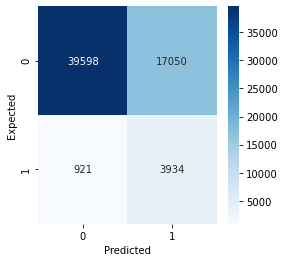

In [19]:
print("Matrice confusion XGBoost")
aff_confusion_matrix(df_results["y_true"], df_results["y_pred_xgb_smoted_bin"])

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

nb_models = 1

df_metrics = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1_score"], index=["XGBoost"])

# j=3 représente la 3eme colonne du dataframe df_results
# on cible les colonnes de valeurs prédites avec cette variable
j = 2

for i in np.arange(0, nb_models):
    
    df_metrics["Accuracy"][i] = round(accuracy_score(df_results["y_true"], df_results.iloc[:, j]), 2)
    df_metrics["Precision"][i] = round(precision_score(df_results["y_true"], df_results.iloc[:, j]), 2)
    df_metrics["Recall"][i] = round(recall_score(df_results["y_true"], df_results.iloc[:, j]), 2)
    df_metrics["F1_score"][i] = round(f1_score(df_results["y_true"], df_results.iloc[:, j]), 2)
    
    j += 2

df_metrics

Accuracy Precision Recall F1_score
XGBoost     0.71      0.19   0.81      0.3

### Prédiction réelle et analyse avec Lime et Shap

In [21]:
# Make predictions
num=6
item = test_domain[num]
print (type(test_domain))
print (type(item))
print (test_domain.shape)
item = item.reshape(1,243)
print (item.shape)
test_sample = test_domain[num] # pour Lime

xgb_pred = clf_xgb.predict_proba(item)
print (xgb_pred )

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(48744, 243)
(1, 243)
[[0.8169729 0.1830271]]


In [22]:
def make_prediction(num):
    item = test_domain[num]
    #print (type(test_domain))
    #print (type(item))
    #print (test_domain.shape)
    item = item.reshape(1,243)
    #print (item.shape)
    test_sample = test_domain[num] # pour Lime

    xgb_pred = clf_xgb.predict_proba(item)
    return (xgb_pred)

In [23]:
res = make_prediction(23)
print (res)

[[0.7588924  0.24110757]]


proba 0


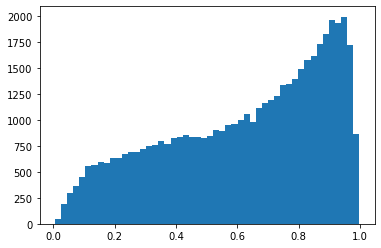

proba 1


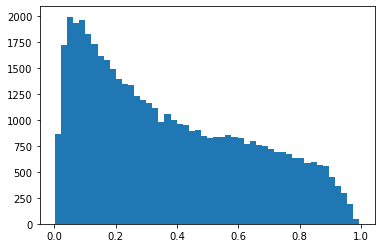

In [24]:
out = clf_xgb.predict_proba (test_domain)
print ('proba 0')
plt.hist(out[:,0], bins=50)
plt.show()
print ('proba 1')
plt.hist(out[:,1], bins=50)
plt.show()

### Lime

In [25]:
import lime
from lime import lime_tabular
RANDOM_STATE=2

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_smt_domain_df),
    feature_names=X_smt_domain_df.columns.values,
    # categorical_features=  we don't have any here
    mode='classification',
    verbose=True,
    random_state = RANDOM_STATE
)

lime_exp = lime_explainer.explain_instance(
    data_row=test_sample, ##new data
    predict_fn=clf_xgb.predict_proba,
    num_features=20
)


Intercept 1.3252292907288057
Prediction_local [0.24337712]
Right: 0.1830271


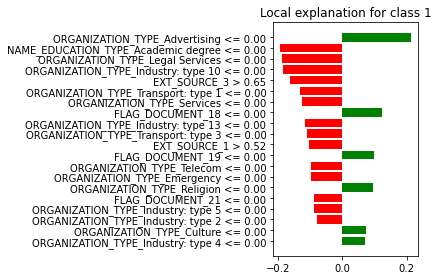

In [26]:
# Plot local explanation
plt = lime_exp.as_pyplot_figure()
plt.tight_layout()

In [27]:
lime_exp.show_in_notebook(show_table=True, show_all=False)

### Shap

In [28]:
import shap
explainer = shap.TreeExplainer(clf_rf)

# shap_values  = une list de deux matrices
shap_values = explainer.shap_values(X_test_domain_df.iloc[0:100,:])

In [29]:
type(X_test_domain_df)

pandas.core.frame.DataFrame

In [30]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], test_sample)

In [31]:
# Interactive visualisation
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test_domain_df.iloc[0:100,:])

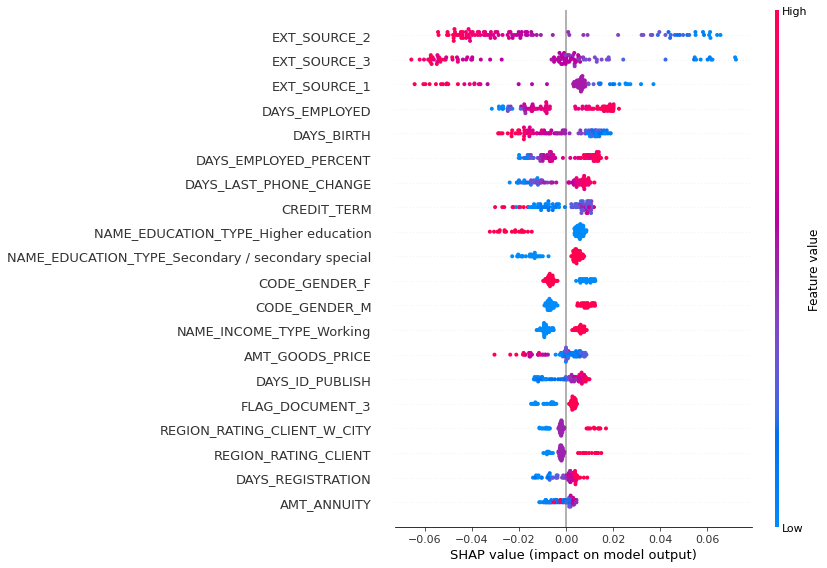

In [32]:
# summary plot (feature iportance)
shap.summary_plot(shap_values[1], X_test_domain_df.iloc[0:100,:])